In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
plt.rcParams['figure.figsize'] = [10, 10]

## Pull in data from Johns Hopkins CSSE (https://github.com/CSSEGISandData/COVID-19)

In [39]:
data_1 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
data_2 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
data = data_1.append(data_2)

In [40]:
def deathsByCountry(countryNames, filters=None, byFirstDeath=True):
    results = [deathsByCountrySingle(countryName, filters, byFirstDeath) for countryName in countryNames]
    return pd.concat(results, axis=1)

In [63]:
#compare by date of first death
def renormalizeByDaysSinceFirstDeath(df, name, suffix='-Total'):
    startIndex = df.index[df[name + suffix] > 0].tolist()[0]
    firstDeathIndex = df.index.get_loc(startIndex)
    df2 = df.reset_index()
    values = df2.index.values
    df2['days-since-first-death'] = values
    df2['days-since-first-death'] = df2['days-since-first-death'] - firstDeathIndex
    df2 = df2[df2['days-since-first-death'] > -1].set_index('days-since-first-death')
    return df2

In [70]:
def deathsByCountrySingle(countryName, filters=None, byFirstDeath=True):
    #can either get data for the whole country - or just a specific region
    if 'province' in countryName:
        totalDeaths = data.loc[(data['Country/Region'] == countryName['country']) & (data['Province/State'] == countryName['province'])]
        name = countryName['country'] + '-' + countryName['province']
    else: 
        totalDeaths = data.loc[(data['Country/Region'] == countryName) & (pd.isna(data['Province/State']))]
        name = countryName
    #transpose so the we have rows by date - and drop the geolocation/labels we don't need
    transposed = totalDeaths.T.drop(axis=0, labels=['Lat', 'Long', 'Province/State', 'Country/Region'])
    rename_totals = transposed.rename(columns={transposed.columns.values[0]: name + '-Total'}).astype({name + '-Total': 'int32'})
    df = pd.DataFrame()
    if (byFirstDeath):
        byFirst = renormalizeByDaysSinceFirstDeath(rename_totals, name)
        df[name + '-Total'] = byFirst[name + '-Total']
    else:
        df[name + '-Total'] = rename_totals[name + '-Total']
    singleDayTally = df.diff()     
    df[name + '-dailyDeaths'] = singleDayTally
    #percentage increase in deaths since yesterday
    percChange = df[name + '-dailyDeaths'].shift(-1)/df[name + '-Total']
    #inverse of rolling average of % change in deaths - approximation of how many days until death count doubles
    df[name + '-deaths-double-time(days)'] = 1/percChange.rolling(window=3).mean().shift(1)
    if (filters is None):
        return df
    return df[name + '-' + filters]

In [87]:
regionsToCompare = ['US', 
                      {'country': 'US', 'province': 'New York'}, 
                      'Spain', 
                      'Italy', 
                      'Iran', 
                      'United Kingdom', 
                      {'country': 'China', 'province': 'Hubei'}]

## Death totals by country/region by since 1/22

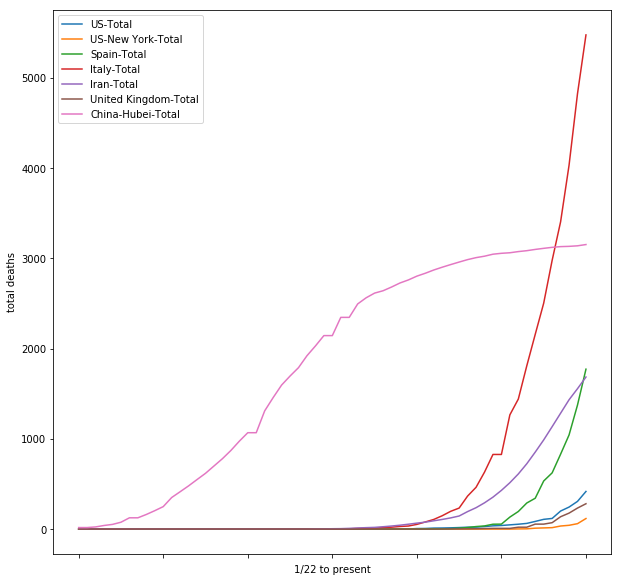

In [99]:
plot = deathsByCountry(regionsToCompare, 'Total', False).plot(kind='line')
plot.set_ylabel("total deaths")
plot.set_xlabel("1/22 to present")
plot

In [89]:
deathsByCountry(regionsToCompare, 'Total', False)

,US-Total,US-New York-Total,Spain-Total,Italy-Total,Iran-Total,United Kingdom-Total,China-Hubei-Total
1/22/20,0,0,0,0,0,0,17
1/23/20,0,0,0,0,0,0,17
1/24/20,0,0,0,0,0,0,24
1/25/20,0,0,0,0,0,0,40
1/26/20,0,0,0,0,0,0,52
1/27/20,0,0,0,0,0,0,76
1/28/20,0,0,0,0,0,0,125
1/29/20,0,0,0,0,0,0,125
1/30/20,0,0,0,0,0,0,162
1/31/20,0,0,0,0,0,0,204


## Same as above, but instead looking at days since first death on x-axis

*Note that Hubei started with 17 deaths at the start of this dateset so it's shifted a bit to the left

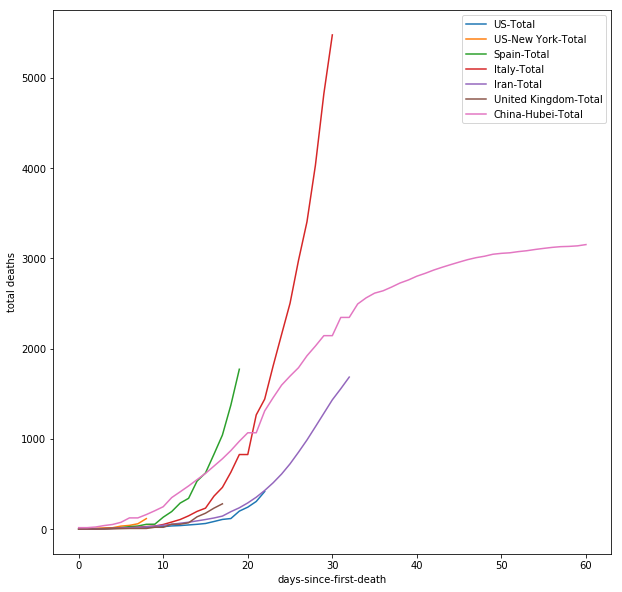

In [95]:
totalsPlot = deathsByCountry(regionsToCompare, 'Total').plot(kind='line').set_ylabel("total deaths")

In [91]:
deathsByCountry(regionsToCompare, 'Total').head(40)

,US-Total,US-New York-Total,Spain-Total,Italy-Total,Iran-Total,United Kingdom-Total,China-Hubei-Total
days-since-first-death,,,,,,,
0,1.0,2.0,1.0,1.0,2.0,1.0,17
1,1.0,3.0,2.0,2.0,2.0,2.0,17
2,6.0,10.0,3.0,3.0,4.0,2.0,24
3,7.0,13.0,5.0,7.0,5.0,3.0,40
4,11.0,16.0,10.0,10.0,8.0,4.0,52
5,12.0,34.0,17.0,12.0,12.0,6.0,76
6,14.0,42.0,28.0,17.0,16.0,8.0,125
7,17.0,60.0,35.0,21.0,19.0,8.0,125
8,21.0,117.0,54.0,29.0,26.0,8.0,162


## Based on 3 day running average - number of days until death total to double

This is where I'd like to note that the assumption implicitly made here: https://finance.yahoo.com/news/hell-coming-mathematical-proof-185019616.html that the total number of deaths (and thus total infections) doubling roughly every 3 days seems to break down when looking at trends from other countries.
We can see that in every country/region the time to double in days does not hold steady - in every case (even in Italy) time to double rises over time. 

In [92]:
deathsByCountry(regionsToCompare, 'deaths-double-time(days)').head(40)

,US-deaths-double-time(days),US-New York-deaths-double-time(days),Spain-deaths-double-time(days),Italy-deaths-double-time(days),Iran-deaths-double-time(days),United Kingdom-deaths-double-time(days),China-Hubei-deaths-double-time(days)
days-since-first-death,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.580645,0.957447,1.384615,1.058824,2.400000,2.000000,2.781818
4,0.522822,1.047449,1.384615,1.326316,1.621622,3.600000,2.176387
5,3.618799,1.811847,1.267606,1.529126,2.222222,2.250000,2.100539
6,3.618799,1.885531,1.278195,2.870159,2.093023,2.571429,2.133295
7,6.357798,1.677041,1.878453,3.521289,2.938776,3.600000,2.711802
8,4.868182,1.858891,2.083455,2.904407,3.373613,9.000000,3.188990


## Number of deaths by country/region since day that region had first death

Text(0, 0.5, 'total deaths')

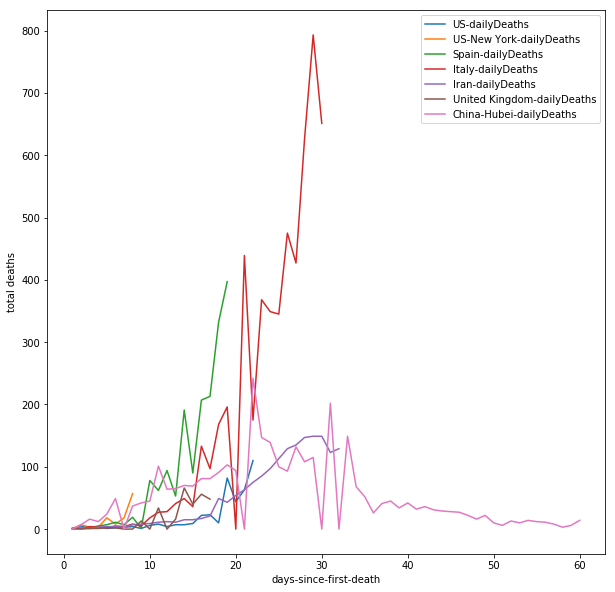

In [96]:
deathsByCountry(regionsToCompare, 'dailyDeaths').plot(kind='line').set_ylabel("total deaths")

Feel free to use this as a starter for your own analysis!